## 第75讲 使用OpenCV HAAR Cascade Classifiers识别(图片)人脸和眼部特征


## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

This uses Adaboost algorithm mainly while training and detection of the images based on several features available.

AdaBoost is a training process for face detection, which selects only those features known to improve the classification (face/non-face) accuracy of our classifier. In the end, the algorithm considers the fact that generally: most of the region in an image is a non-face region. Considering this, it’s a better idea to have a simple method to check if a window is a non-face region, and if it's not, discard it right away and don’t process it again. So we can focus mostly on the area where a face is

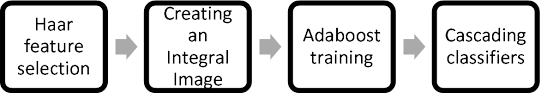

In [91]:
from IPython.display import Image
Image(filename='Lesson75-OpenCV/image_examples/Haas1.png')

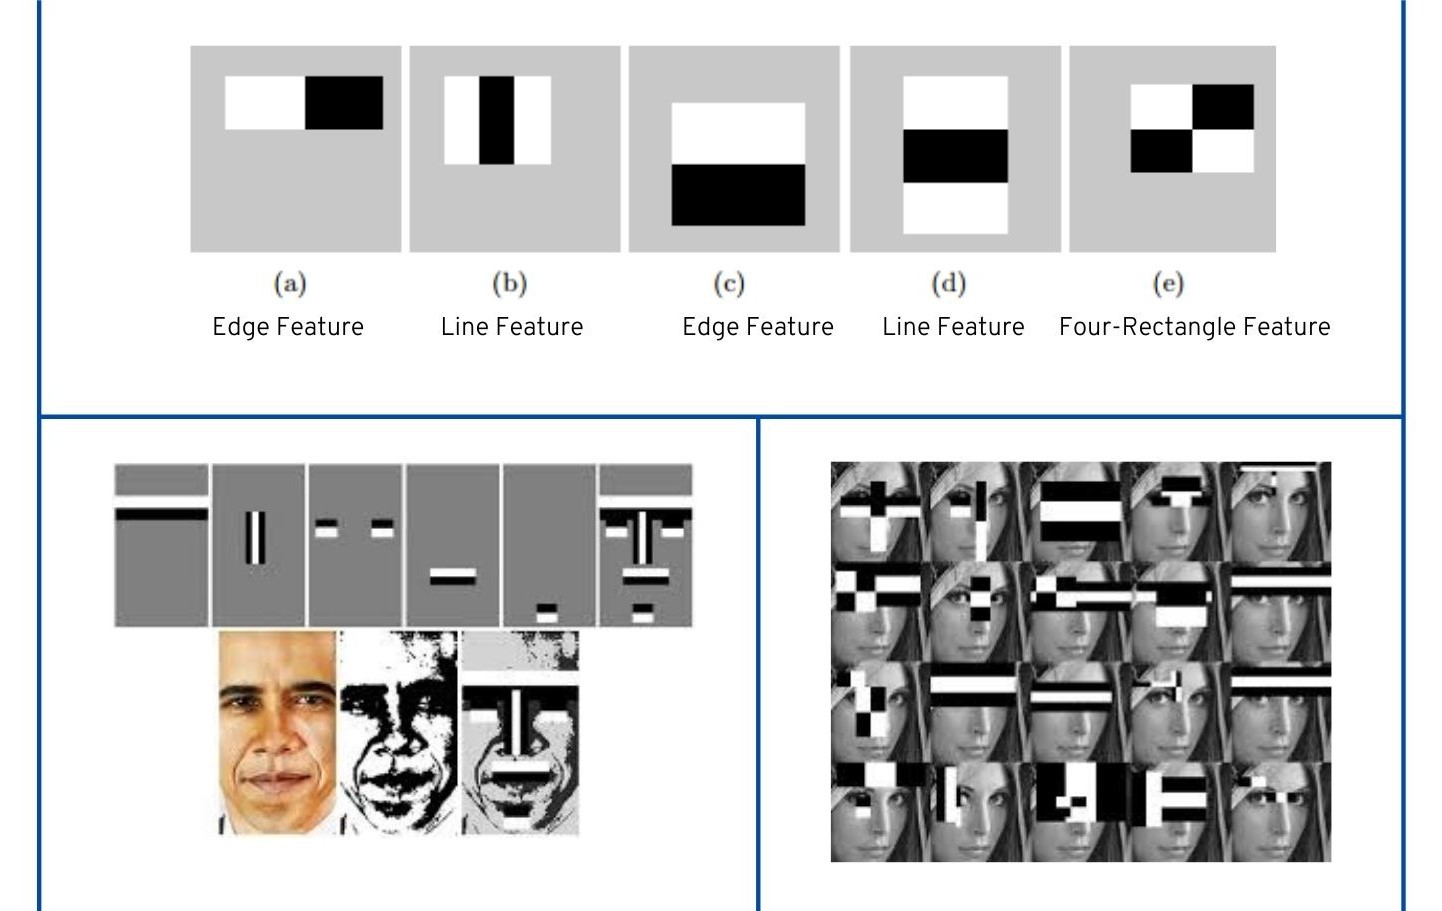

In [32]:
from IPython.display import Image
Image(filename='Lesson75-OpenCV/image_examples/Haas.jpeg')

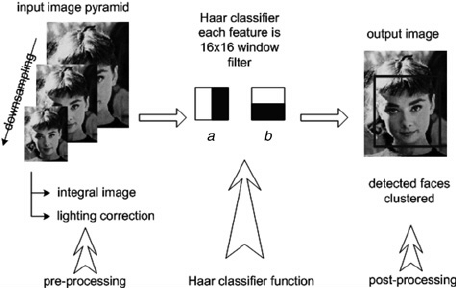

In [29]:
from IPython.display import Image
Image(filename='Lesson75-OpenCV/image_examples/Face-detection-flow-based-on-the-Haar-classifier.png')

### Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6. 
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  


In [80]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
#image = cv2.imread('Lesson75-OpenCV/image_examples/obama.jpg')
#image = cv2.imread('Lesson75-OpenCV/image_examples/Trump.jpg')
image = cv2.imread('Lesson75-OpenCV/image_examples/team.jpg')
#image = cv2.imread('D:/python/Project0-Python-MachineLearning/Lesson74-Monkey.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    #cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255),2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [81]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('Lesson75-OpenCV/image_examples/team.jpg')
# load the pre-trained model
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 2)
# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

### Let's combine face and eye detection

In [83]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

#img = cv2.imread('Lesson75-OpenCV/image_examples/obama.jpg')
#img = cv2.imread('Lesson75-OpenCV/image_examples/Trump.jpg')
img = cv2.imread('Lesson75-OpenCV/image_examples/team.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('img',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        cv2.imshow('img',img)
        cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [90]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

#img = cv2.imread('Lesson75-OpenCV/image_examples/obama.jpg')
#img = cv2.imread('Lesson75-OpenCV/image_examples/Trump.jpg')
img = cv2.imread('Lesson75-OpenCV/image_examples/team.jpg')
#img = cv2.imread('D:/python/Project0-Python-MachineLearning/Lesson74-Monkey.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
imshow('img',img)
waitKey(0)
destroyAllWindows()